# Sample Statistics
Reading: Emile-Geay Chapter 4.I and 4.II (p51-58) 

Other resources: 
https://en.wikipedia.org/wiki/Sampling_distribution

https://en.wikipedia.org/wiki/Central_limit_theorem

In [2]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



# These are some parameters to make figures nice (and big)
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Sample Mean
Consider a process gaussian process. Let's say this process has true mean $\mu$ and true variance $\sigma^2$. When we work with random samples in python (or any programming language), the process mean and process variance are the values of $\mu$ and $\sigma$ we pass to the method that generates random samples such as 
<code>stats.norm.rvs(loc=mu,scale=sigma, size=Ndraws)</code> 

We denote a random variable with a Normal/Gaussian distribution with location/mean $\mu$ and scale/variance $\sigma^2$ as $$ X\sim\mathcal{N}(\mu,\sigma^2)$$

If we only have a sample of this random variable we can estimate the mean using the **sample mean**:
$$\overline{X}_n=\frac{1}{n}\sum_{i=1}^n X_i$$. 

The law of large numbers tells us that the sample mean converges to the process mean for a large enough sample. 
### **Definition: Consistency**
An estimator is consistent if it asymptotes to the process value *as the size of the value increases*. For the mean,  that statement of consistency is precisely the law of large numbers:

$$\overline{X}_n \rightarrow \mu  \text{ as } n\rightarrow \infty$$

It turns out, the sample mean is also an **unbiased** estimator. 

### Definition: Unbiased estimator.
An estimator is unbiased if its expectation is the same as the process value. 

$$E(\overline{X}_n)=E(X)=\mu$$


While the two may look similar, they are actually different. The sample mean is itself a random variable, as it is the sum of $n$ random variables. Thus, it will have a distribution and it will have a mean - or expected - value. 

Here is one way to think about this. Say we are taking daily measurements of a quantity in the lab. We want to measure a true quantity, but we can only do so with some error. Let's say those errors are normally distributed We can model our measurement as:
$$X=\mu +\varepsilon$$  
where $\varepsilon$ are random errors with zero-mean and variance $\sigma$. In this case oure measurement $X$ is a random variable whose process mean is the true value of the quantity we are after. 

Let's say we take a sample of size $n$ of that process. Consistency tells us that as the sample mean gets *larger*, i.e., as we take more independent measurements and average them together, we would approach the true mean. The bias tell us what would happen if we repeat the measurement. Say, we take another sample mean of size $n$ tomorrow, and another the day after, and so on. Would the mean of all of those realizations of the sample mean also approach the true mean? Yes, if the estimator is also unbiased. 

In practice, we may not be able to either take an infinitely large sample, or repeate the measurement. It's possible that all we have is a sample of size n. We would like to know whether that sample is an unbiased estimate. 

For the sample mean, this is easy to prove. Since the sample mean is a random variable, we can also apply the law of large numbers to it: Expectation of the sample mean would actually be the average of an infinite number of sample means. 

$$E(\overline{X}_n)=\lim_{k\rightarrow \infty} \frac{1}{k}\sum_{j=1}^k (\overline X_n)_j$$ 

A simple re-ordering of the sums shows us that the sample mean is an unbiased estimator:

$$E(\overline{X}_n)=\lim_{k\rightarrow \infty} \frac{1}{k}\frac{1}{n}\sum_{j=1}^k\sum_{i=1}^n X_{i,j}$$
$$E(\overline{X}_n)=\frac{1}{n}\sum_{j=1}^n\left[\lim_{k\rightarrow \infty} \frac{1}{k}\sum_{i=1}^k X_{i,j}\right]$$

By the law of large numbers, 
$$E(\overline{X}_n)=\frac{1}{n}\sum_{j=1}^n n\mu=\mu$$




Let's convince us of this with some numerics. Let's take a sample mean, look at what happens as we increase the sample size, and then let's look at what the distribution of the sample mean is. 

**Consistency:**

Text(0, 0.5, 'sample mean $=\\sum_{i=1}^n X_i$')

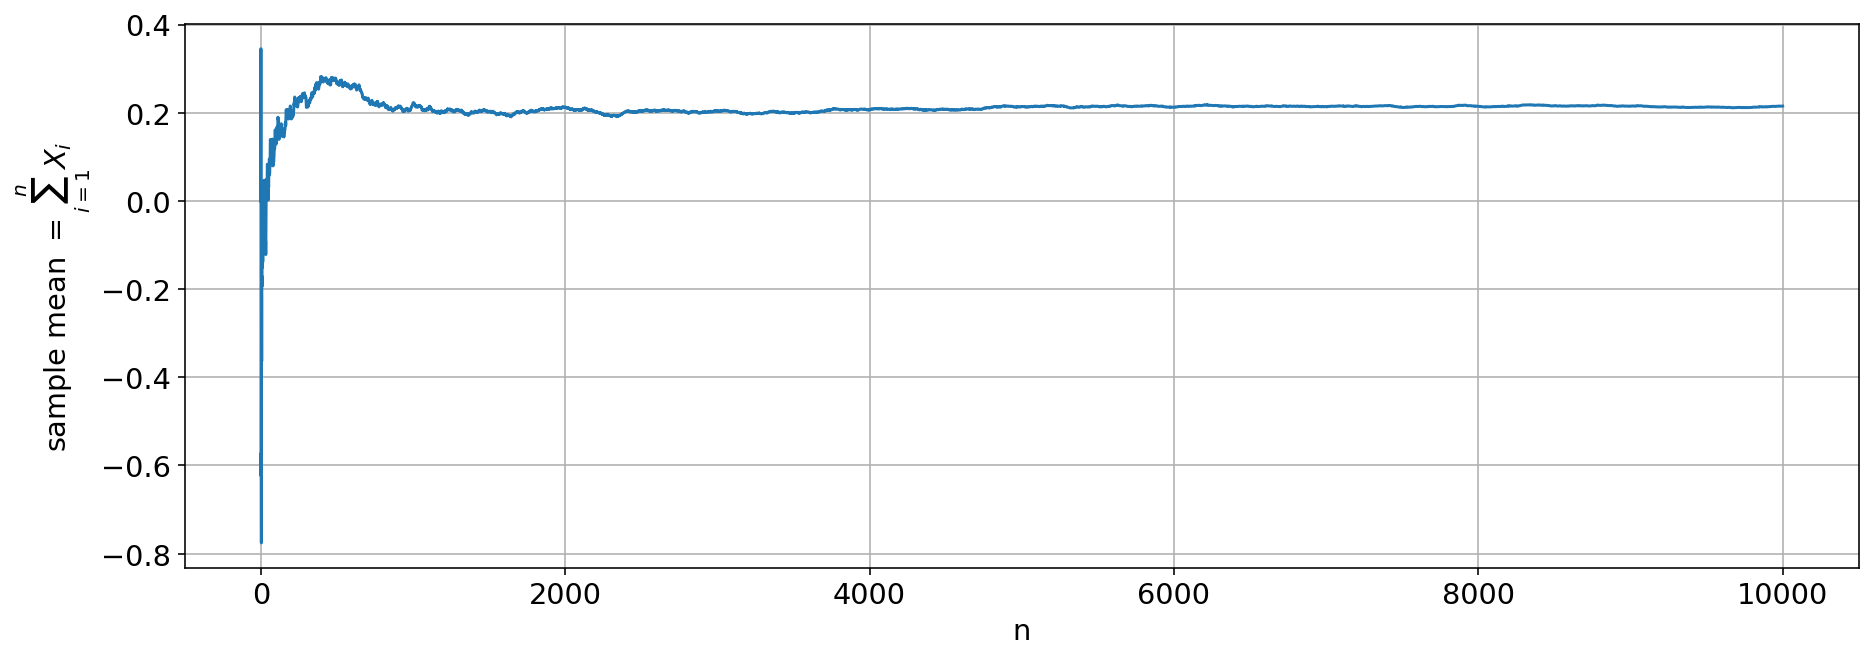

In [8]:
# Consistency 
mu=0.2;
sigma=1;
sample_size_max=10000

#preallocate vector of sample sizes
sample_mean=np.zeros([sample_size_max,1])

X_norm=stats.norm.rvs(loc=mu,scale=sigma, size=sample_size_max)

# let's compute the sample mean as a function of sample size (or number of draws)
for n in np.arange(1,sample_size_max):
    sample_mean[n]=(1/n)*np.sum(X_norm[0:n])

fig, ax = plt.subplots(1, 1)
ax.plot(sample_mean)
ax.grid()
ax.set_xlabel('n')
ax.set_ylabel('sample mean $=\sum_{i=1}^n X_i$')


**Bias**
In the cell below, change the number of samples to convince yourself that the expected value of the sample mean converges to the process mean:

Text(0.5, 1.0, 'distribution of sample mean')

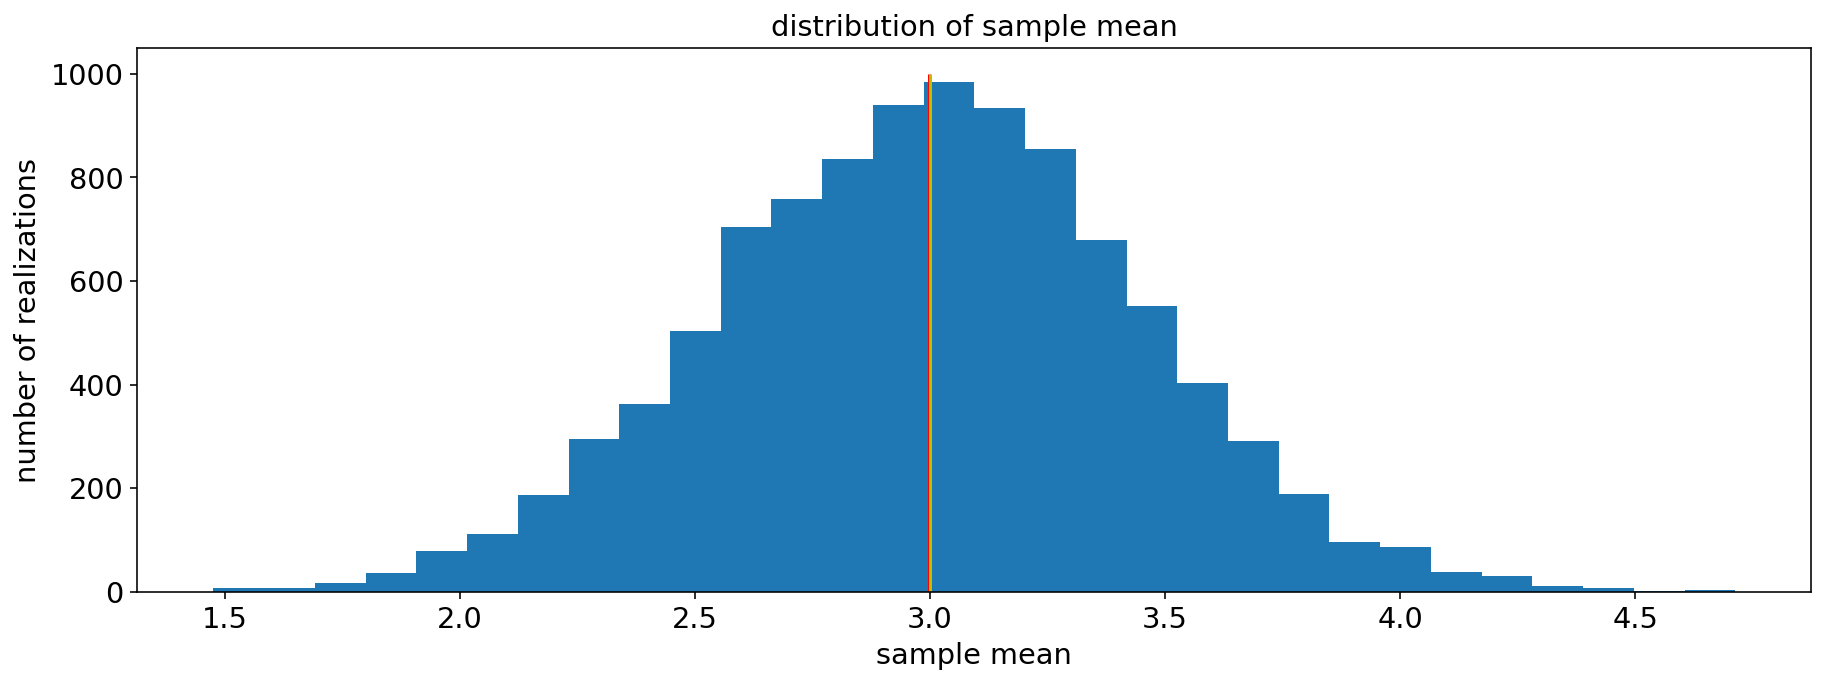

In [15]:
# Consistency 
mu=3;
sigma=2;

# sample size and number of samples
sample_size=20
nsamples=10000


# preallocate vector of sample means
sample_mean=np.zeros([nsamples,1])

# compute a number nsamples of sample means
for n in np.arange(nsamples):
    X_norm=stats.norm.rvs(loc=mu,scale=sigma, size=sample_size)
    sample_mean[n]=(1/sample_size)*np.sum(X_norm)

fig, ax = plt.subplots(1, 1)
ax.hist(sample_mean,30)
ax.vlines(np.mean(sample_mean),ymin=0,ymax=nsamples/10,colors='r',label='expected sample mean')
ax.vlines(mu,ymin=0,ymax=nsamples/10,colors='y',label='process mean')
ax.set_xlabel('sample variance')
ax.set_xlabel('sample mean')
ax.set_ylabel('number of realizations')
ax.set_title('distribution of sample mean')

<hr style="border:2px solid black"> </hr>



<hr style="border:2px solid black"> </hr>

# Sample Variance / Standard Deviation

Remember, the variance is defined as:
$$V(X)=E([X-\mu)^2]$$

Just like the sample mean, we can define an estimator for the variance as the sample variance. 
$$s_n=\frac{1}{n}\sum_{i=1}^n(X_i-\overline{X}_n)^2$$ 

Now let's check consistency and bias for the sample variance

Text(0, 0.5, 'sample variance')

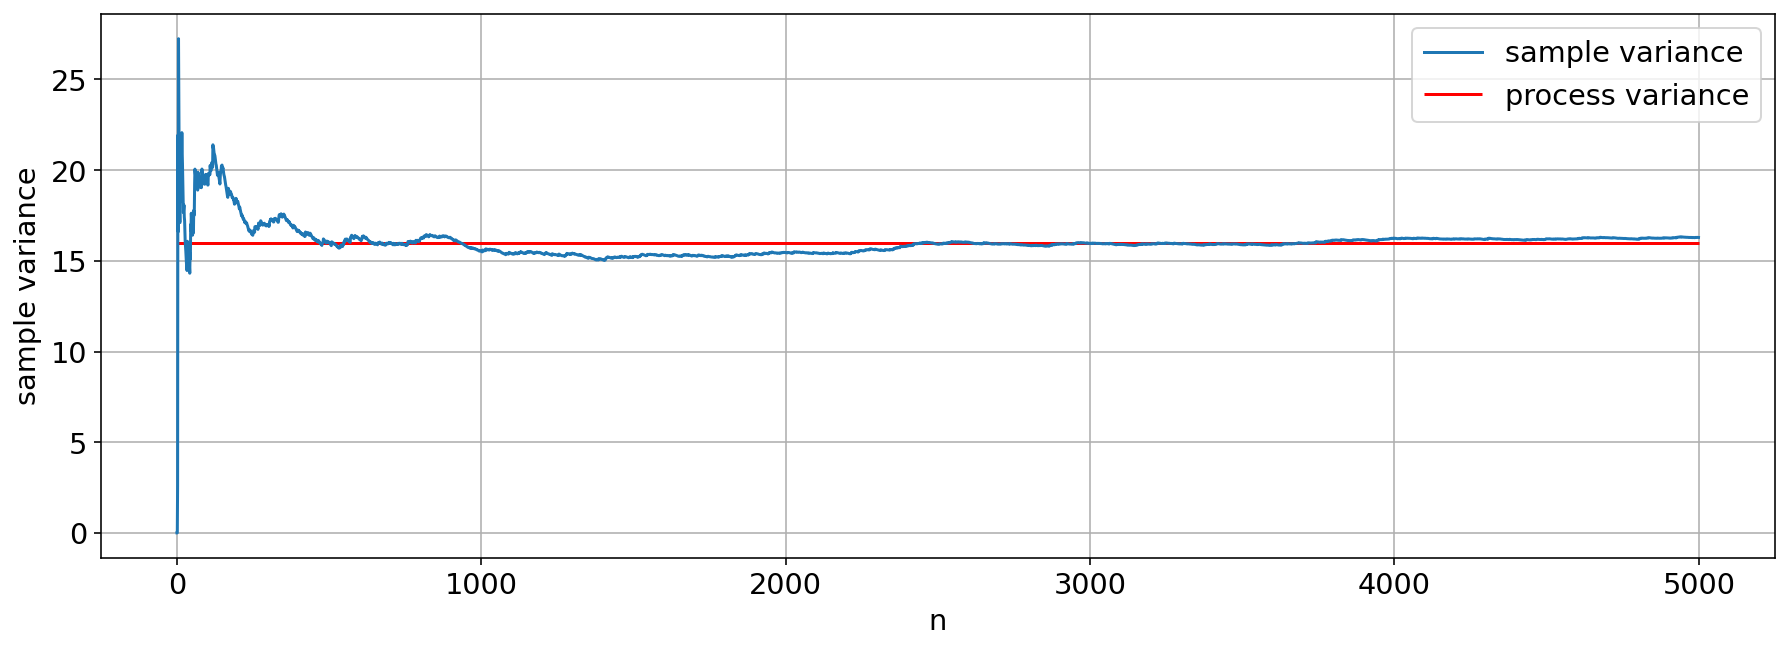

In [179]:
# Consistency
mu=10;
sigma=4; #variance =sigma^2
sample_size_max=5000

#preallocate vector of sample sizes
sample_var=np.zeros([sample_size_max,1])

X_norm=stats.norm.rvs(loc=mu,scale=sigma, size=sample_size_max)

# let's compute the sample variance as a function of sample size (or number of draws)
for n in np.arange(1,sample_size_max):
    sample_var[n]=(1/n)*np.sum((X_norm[0:n]-np.mean(X_norm[0:n]))**2)

fig, ax = plt.subplots(1, 1)

ax.plot(sample_var,label='sample variance')
ax.hlines(sigma**2,xmin=0,xmax=sample_size_max,color='r',label='process variance')
ax.grid()
ax.set_xlabel('n')
ax.legend()
ax.set_ylabel('sample variance')

(0.0, 0.5)

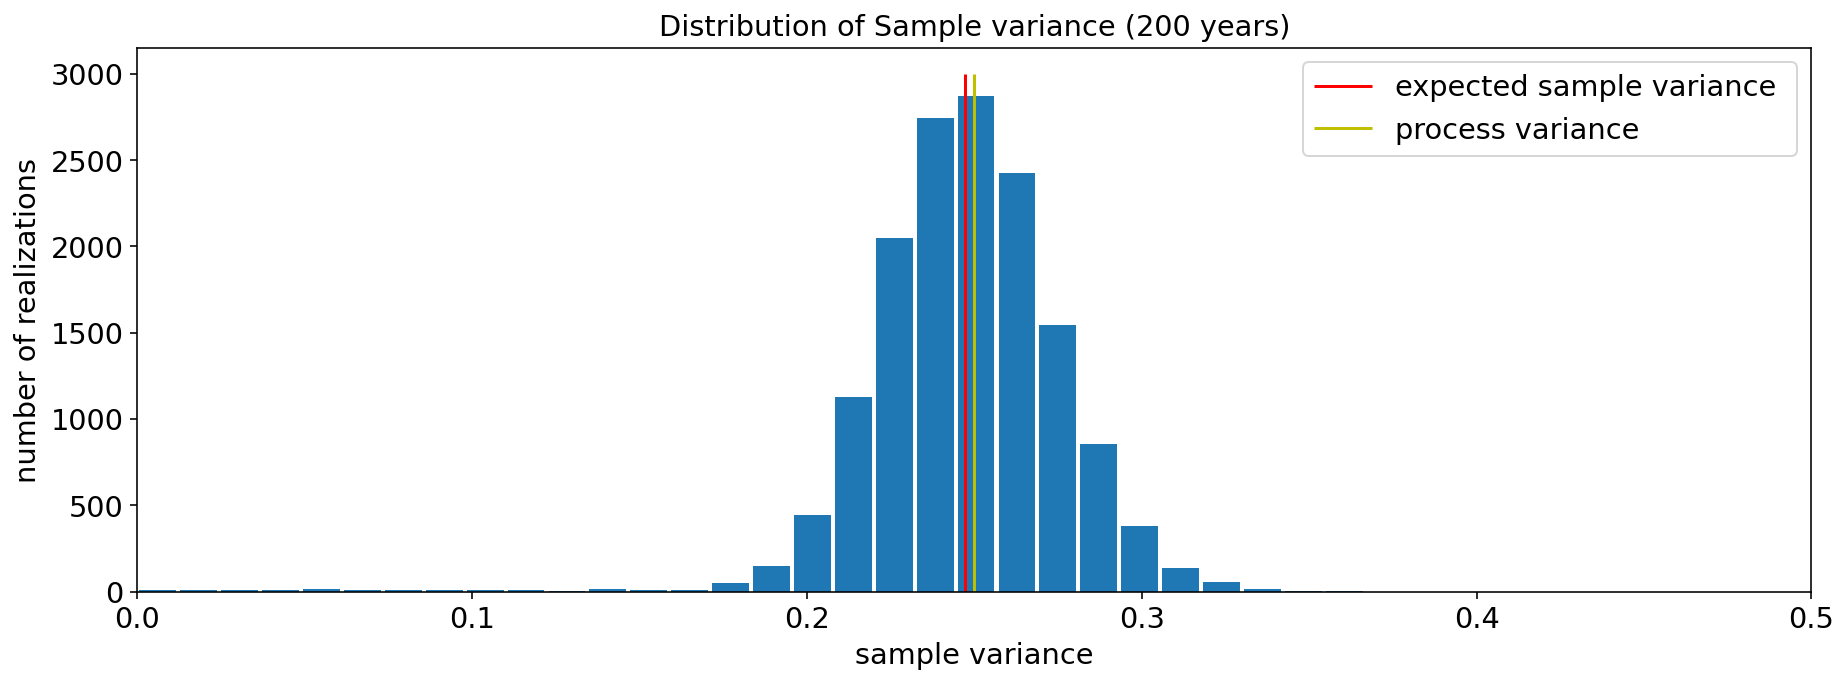

In [59]:
# Bias
mu=0.4;
sigma=0.5; #variance =sigma^2

# sample size and number of samples
sample_size=200
nsamples=15000

# preallocate vector of sample means
sample_var=np.zeros([nsamples,1])

# compute a number nsamples of sample means
for n in np.arange(1,nsamples):
    X_norm=stats.norm.rvs(loc=mu,scale=sigma, size=sample_size)
    sample_var[n]=(1/sample_size)*np.sum((X_norm[0:n]-np.mean(X_norm[0:n]))**2)

fig, ax = plt.subplots(1, 1)
ax.hist(sample_var,30,rwidth=0.9)
ax.vlines(np.mean(sample_var),ymin=0,ymax=nsamples/5,colors='r',label='expected sample variance ')
ax.vlines(sigma**2,ymin=0,ymax=nsamples/5,colors='y',label='process variance')
ax.set_xlabel('sample variance')
ax.set_ylabel('number of realizations')
ax.set_title('Distribution of Sample variance (200 years)')
ax.legend()
ax.set_xlim(left=0,right=0.5)


So, the simple sample standard variance is a ***consistent, but biased*** estimator of the process variance. Sure, if the sample is large enough, it will eventually converget. But for finite samples, its expected value is **not** equal to the true value of the process variance. 

It turns out that if we want a consistent *and* unbiased estimator for the variance we have to use a corrected sample variance
$$s_{n-1}=\frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X}_n)^2$$ 


We will show why that is in class. 

## Exercise:
Show (numerically) that the corrected sample variance is unbiased. Repeat the experiment above by estimating the mean of the distribution of the corrected sample variance, and show that is matches the process variance .

In [175]:
# Exericse code block:


## Sampling Distribution & the central limit theorem

Since the sample mean is a random variable, it means it has a distribution. The Central Limit Theorem tells us what that distribution is:

#### Central Limit Theorem: 
For a sequence $\{X_1,\ldots, X_n\}$,of independent and identically distributed random variables with mean $\mu$ and variance $\sigma^2$, if the sample size $n$ is large enough, the distribution of the sample mean is normal with mean $\mu$ and variance $\sigma^2/n$:

$$\overline{X}_n=\frac{1}{n}\sum_{i=1}^n X_i \sim \mathcal N(\mu,\sigma^2/n)$$. 

This is one of the most powerful results in statistics. It tells us how quickly the uncertainty in the mean decreases: in particular, the variance decreases as the number of observations (and that the standard deviation decreases as the square root of the number of observations). 



**Attention** Notice that the Central Limit Theorem does **not** require the random variables to be normal/gaussian. That's right, the sample mean of **any** random variable tends to be normal/gaussian for a large enough sample.  

![Patrikc](https://c.tenor.com/3xoRK7hFE3gAAAAC/patrick-star-spongebob-squarepants.gif "Patrick")

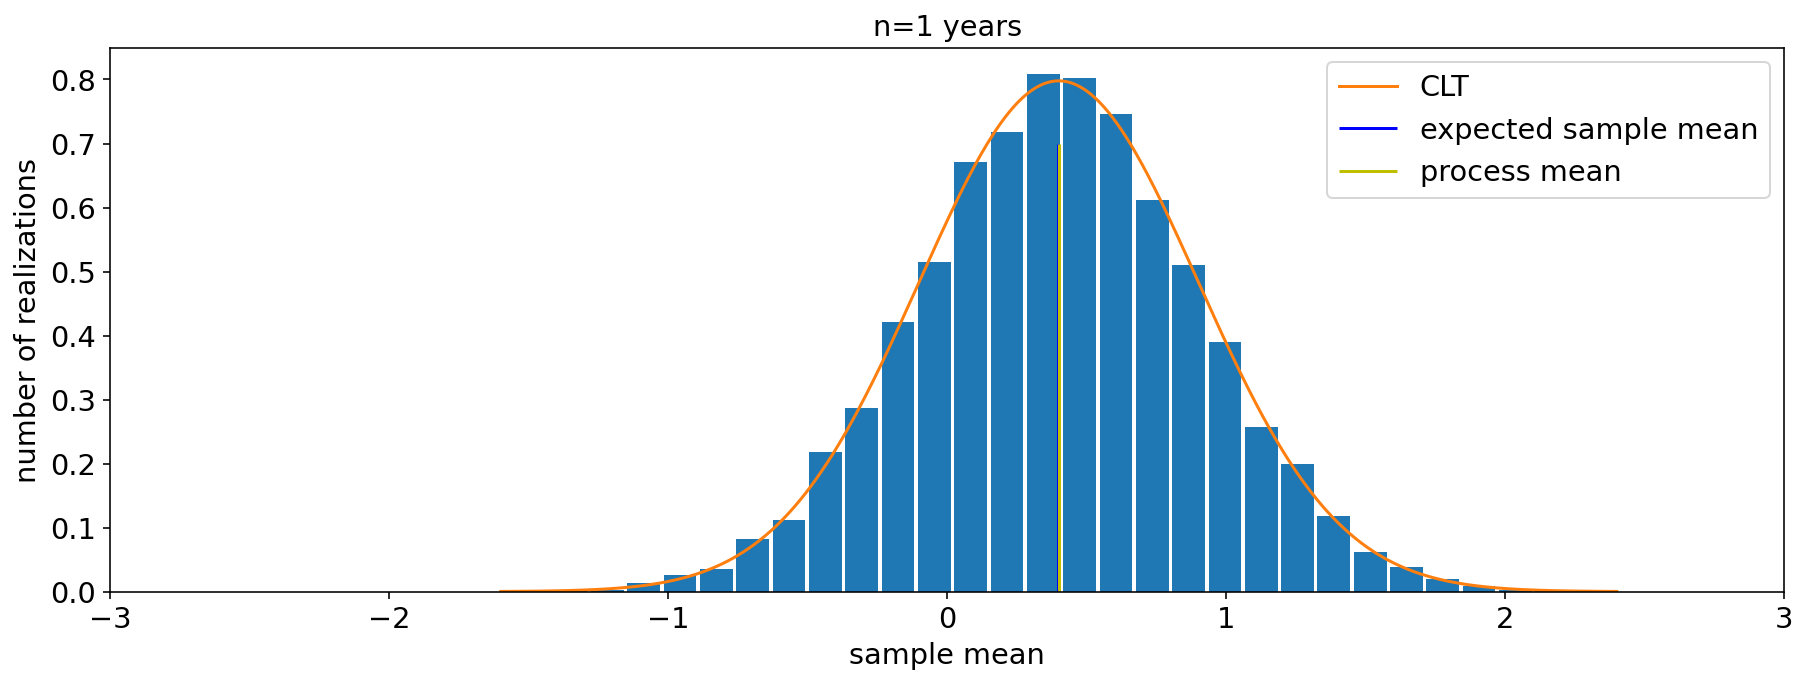

In [41]:
# Consistency 
mu=0.4;
sigma=0.5;

# sample size and number of samples
sample_size=1
nsamples=10000


# preallocate vector of sample means
sample_mean=np.zeros([nsamples,1])

# compute a number nsamples of sample means
for n in np.arange(nsamples):
    X_norm=stats.norm.rvs(loc=mu,scale=sigma, size=sample_size)
    sample_mean[n]=(1/sample_size)*np.sum(X_norm)

# the pdf of the normal distribution suggested by the CLT. Let's plot that from -4 to +4 standard deviations
mu_clt=mu;
sigma_clt=sigma/np.sqrt(sample_size)
x_clt=np.linspace(mu-4*sigma_clt,mu+4*sigma_clt,1000)
pdf_clt=stats.norm.pdf(x_clt,mu_clt,sigma_clt)
    
fig, ax = plt.subplots(1, 1)
ax.hist(sample_mean,30,density=True,rwidth=0.9)
ax.plot(x_clt,pdf_clt,label='CLT')
ax.vlines(np.mean(sample_mean),ymin=0,ymax=0.7,colors='b',label='expected sample mean')
ax.vlines(mu,ymin=0,ymax=0.7,colors='y',label='process mean')
ax.set_xlabel('sample variance')
ax.set_xlabel('sample mean')
ax.set_ylabel('number of realizations')
ax.set_xlim(left=-3,right=3)
ax.set_title('n=1 years')
ax.legend()


A# Exercise:
Show that the central limit theorem holds for distributions other than the normal distribution. 